In [1]:
# Importing all the modules and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,recorded_timestamp,total_energy_use,lighting_energy_use,temp_sensor_1,humidity_sensor_1,temp_sensor_2,humidity_sensor_2,temp_sensor_3,humidity_sensor_3,temp_sensor_4,...,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41
0,11-01-2016 17:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,11-01-2016 17:10,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11-01-2016 17:20,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11-01-2016 17:30,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11-01-2016 17:40,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   recorded_timestamp    19735 non-null  object 
 1   total_energy_use      19735 non-null  int64  
 2   lighting_energy_use   19735 non-null  int64  
 3   temp_sensor_1         19735 non-null  float64
 4   humidity_sensor_1     19735 non-null  float64
 5   temp_sensor_2         19735 non-null  float64
 6   humidity_sensor_2     19735 non-null  float64
 7   temp_sensor_3         19735 non-null  float64
 8   humidity_sensor_3     19735 non-null  float64
 9   temp_sensor_4         19735 non-null  float64
 10  humidity_sensor_4     19735 non-null  float64
 11  temp_sensor_5         19735 non-null  float64
 12  humidity_sensor_5     19735 non-null  float64
 13  temp_sensor_6         19735 non-null  float64
 14  humidity_sensor_6     19735 non-null  float64
 15  temp_sensor_7      

In [4]:
df['recorded_timestamp'] = pd.to_datetime(df['recorded_timestamp'], format='%d-%m-%Y %H:%M')
df['recorded_timestamp'].head()

0   2016-01-11 17:00:00
1   2016-01-11 17:10:00
2   2016-01-11 17:20:00
3   2016-01-11 17:30:00
4   2016-01-11 17:40:00
Name: recorded_timestamp, dtype: datetime64[ns]

In [5]:
#Dropping the columns that are not needed
for i in range(29, 42):
    df.drop(['Unnamed: ' + str(i)], axis=1, inplace=True)
df.drop(['random_variable_1', 'random_variable_2'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   recorded_timestamp    19735 non-null  datetime64[ns]
 1   total_energy_use      19735 non-null  int64         
 2   lighting_energy_use   19735 non-null  int64         
 3   temp_sensor_1         19735 non-null  float64       
 4   humidity_sensor_1     19735 non-null  float64       
 5   temp_sensor_2         19735 non-null  float64       
 6   humidity_sensor_2     19735 non-null  float64       
 7   temp_sensor_3         19735 non-null  float64       
 8   humidity_sensor_3     19735 non-null  float64       
 9   temp_sensor_4         19735 non-null  float64       
 10  humidity_sensor_4     19735 non-null  float64       
 11  temp_sensor_5         19735 non-null  float64       
 12  humidity_sensor_5     19735 non-null  float64       
 13  temp_sensor_6   

In [6]:
# Checking for any missing values
df.isnull().sum()

recorded_timestamp      0
total_energy_use        0
lighting_energy_use     0
temp_sensor_1           0
humidity_sensor_1       0
temp_sensor_2           0
humidity_sensor_2       0
temp_sensor_3           0
humidity_sensor_3       0
temp_sensor_4           0
humidity_sensor_4       0
temp_sensor_5           0
humidity_sensor_5       0
temp_sensor_6           0
humidity_sensor_6       0
temp_sensor_7           0
humidity_sensor_7       0
temp_sensor_8           0
humidity_sensor_8       0
temp_sensor_9           0
humidity_sensor_9       0
external_temp           0
atmospheric_pressure    0
external_humidity       0
wind_speed_mps          0
visibility_km           0
dew_point_temp          0
dtype: int64

In [7]:
# Checking for outliers using IQR method
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 2138 outliers (10.83%)
lighting_energy_use: 4483 outliers (22.72%)
temp_sensor_1: 515 outliers (2.61%)
humidity_sensor_1: 146 outliers (0.74%)
temp_sensor_2: 546 outliers (2.77%)
humidity_sensor_2: 235 outliers (1.19%)
temp_sensor_3: 217 outliers (1.10%)
humidity_sensor_3: 15 outliers (0.08%)
temp_sensor_4: 186 outliers (0.94%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 179 outliers (0.91%)
humidity_sensor_5: 1330 outliers (6.74%)
temp_sensor_6: 515 outliers (2.61%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 2 outliers (0.01%)
humidity_sensor_7: 42 outliers (0.21%)
temp_sensor_8: 71 outliers (0.36%)
humidity_sensor_8: 17 outliers (0.09%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 21 outliers (0.11%)
external_temp: 440 outliers (2.23%)
atmospheric_pressure: 219 outliers (1.11%)
external_humidity: 239 outliers (1.21%)
wind_speed_mps: 214 outliers (1.08%)
visibility_km: 2522 outliers (12.78%)
dew_point_temp: 11 outliers (0.06%)


In [8]:
# Handling Outliers by capping

# Define a function to cap outliers using IQR method
def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower, upper)
    return df

# Apply capping to the selected columns
for col in numeric_cols:
    df = cap_outliers_iqr(df, col)

In [9]:
# Checking for outliers again after capping

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    percent = (len(outliers) / len(df)) * 100
    print(f"{col}: {len(outliers)} outliers ({percent:.2f}%)")


total_energy_use: 0 outliers (0.00%)
lighting_energy_use: 0 outliers (0.00%)
temp_sensor_1: 0 outliers (0.00%)
humidity_sensor_1: 0 outliers (0.00%)
temp_sensor_2: 0 outliers (0.00%)
humidity_sensor_2: 0 outliers (0.00%)
temp_sensor_3: 0 outliers (0.00%)
humidity_sensor_3: 0 outliers (0.00%)
temp_sensor_4: 0 outliers (0.00%)
humidity_sensor_4: 0 outliers (0.00%)
temp_sensor_5: 0 outliers (0.00%)
humidity_sensor_5: 0 outliers (0.00%)
temp_sensor_6: 0 outliers (0.00%)
humidity_sensor_6: 0 outliers (0.00%)
temp_sensor_7: 0 outliers (0.00%)
humidity_sensor_7: 0 outliers (0.00%)
temp_sensor_8: 0 outliers (0.00%)
humidity_sensor_8: 0 outliers (0.00%)
temp_sensor_9: 0 outliers (0.00%)
humidity_sensor_9: 0 outliers (0.00%)
external_temp: 0 outliers (0.00%)
atmospheric_pressure: 0 outliers (0.00%)
external_humidity: 0 outliers (0.00%)
wind_speed_mps: 0 outliers (0.00%)
visibility_km: 0 outliers (0.00%)
dew_point_temp: 0 outliers (0.00%)


Feature Scaling

In [10]:
# Initialize StandardScaler
scaler = StandardScaler()

# Create a copy of the DataFrame
df_scaled = df.copy()

# Fit and transform the numeric columns
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

# Assign the scaled DataFrame back to df
df = df_scaled

Feature Engineering

In [11]:
# Lag features for total_energy_use (previous 1, 2, and 3 hours)
df['total_energy_use_lag1'] = df['total_energy_use'].shift(1)
df['total_energy_use_lag2'] = df['total_energy_use'].shift(2)
df['total_energy_use_lag3'] = df['total_energy_use'].shift(3)

In [13]:
# Step 2: Convert 'recorded_timestamp' to datetime and extract features
df['hour'] = df['recorded_timestamp'].dt.hour
df['day_of_week'] = df['recorded_timestamp'].dt.dayofweek
df['month'] = df['recorded_timestamp'].dt.month

In [14]:
# Step 3: Create aggregate temperature and humidity features
temp_cols = [col for col in df.columns if 'temp_sensor' in col]
humidity_cols = [col for col in df.columns if 'humidity_sensor' in col]

In [15]:
df['avg_indoor_temp'] = df[temp_cols].mean(axis=1)
df['max_indoor_temp'] = df[temp_cols].max(axis=1)
df['min_indoor_temp'] = df[temp_cols].min(axis=1)
df['range_indoor_temp'] = df['max_indoor_temp'] - df['min_indoor_temp']

In [16]:
df['avg_indoor_humidity'] = df[humidity_cols].mean(axis=1)
df['max_indoor_humidity'] = df[humidity_cols].max(axis=1)
df['min_indoor_humidity'] = df[humidity_cols].min(axis=1)
df['range_indoor_humidity'] = df['max_indoor_humidity'] - df['min_indoor_humidity']

In [17]:
# Rate of change (difference) from previous hour
df['delta_avg_indoor_temp'] = df['avg_indoor_temp'].diff()
df['delta_avg_indoor_humidity'] = df['avg_indoor_humidity'].diff()

In [18]:
# Interaction between indoor temp and humidity
df['temp_humidity_interaction'] = df['avg_indoor_temp'] * df['avg_indoor_humidity']

In [19]:
# 3-hour rolling mean for avg_indoor_temp and avg_indoor_humidity
df['avg_indoor_temp_roll3'] = df['avg_indoor_temp'].rolling(window=3, min_periods=1).mean()
df['avg_indoor_humidity_roll3'] = df['avg_indoor_humidity'].rolling(window=3, min_periods=1).mean()

In [20]:
# Step 4: Interaction features
df['temp_diff_indoor_outdoor'] = df['avg_indoor_temp'] - df['external_temp']
df['humidity_diff_indoor_outdoor'] = df['avg_indoor_humidity'] - df['external_humidity']

In [58]:
# Step 5: Time-based trend features (rolling mean of total energy use)
df['rolling_energy_use_mean'] = df['total_energy_use'].rolling(window=3, min_periods=1).mean()


Feature Selection

In [59]:
# Define target and features
target = 'total_energy_use'
exclude_cols = ['recorded_timestamp', target]
features = [col for col in df.columns if col not in exclude_cols]

In [60]:
X = df[features]
y = df[target]

In [61]:
# Fit Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

RandomForestRegressor(random_state=42)

In [62]:
# Get feature importances
importances = pd.Series(rf.feature_importances_, index=features)
importances = importances.sort_values(ascending=False)

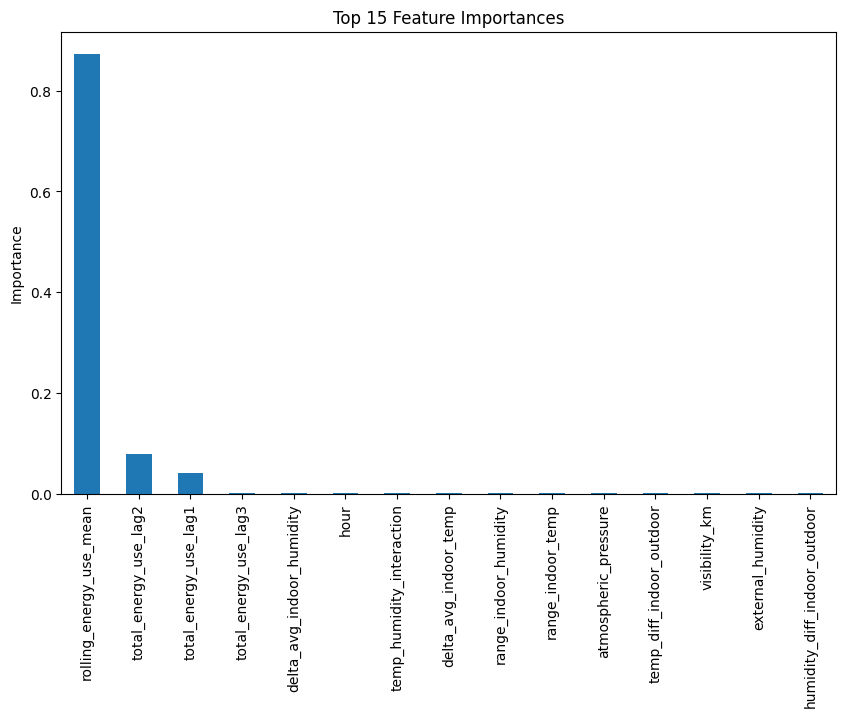

In [63]:
# Plot top 15 features
plt.figure(figsize=(10,6))
importances.head(15).plot(kind='bar')
plt.title('Top 15 Feature Importances')
plt.ylabel('Importance')
plt.show()

In [64]:
# Select top 10 features for modeling
top_features = importances.head(10).index.tolist()
X_selected = X[top_features]
print(X_selected.head())

   rolling_energy_use_mean  total_energy_use_lag2  total_energy_use_lag1  \
0                -0.439645                    NaN                    NaN   
1                -0.439645                    NaN              -0.439645   
2                -0.517237              -0.439645              -0.439645   
3                -0.594828              -0.439645              -0.672419   
4                -0.594828              -0.672419              -0.672419   

   total_energy_use_lag3  delta_avg_indoor_humidity  hour  \
0                    NaN                        NaN    17   
1                    NaN                  -0.016510    17   
2                    NaN                  -0.023696    17   
3              -0.439645                  -0.017408    17   
4              -0.439645                   0.004832    17   

   temp_humidity_interaction  delta_avg_indoor_temp  range_indoor_humidity  \
0                  -1.364569                    NaN               1.139432   
1                  -

In [65]:
X_selected = X_selected.fillna(X_selected.mean())

Modeling

In [66]:
#Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (15788, 10)
Test shape: (3947, 10)


Random Forest Regression

In [67]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [68]:
# Predict on test set
y_pred = model.predict(X_test)

In [69]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [70]:
print("Random Forest Regression Results:")
print(f"MAE: {mae:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R^2: {r2:.4f}")

Random Forest Regression Results:
MAE: 0.0205
RMSE: 0.0040
R^2: 0.9960


Linear Regression

In [71]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred_lr = lr.predict(X_test)

In [73]:
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

In [74]:
print("Linear Regression Results:")
print(f"MAE: {mae_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R^2: {r2_lr:.4f}")

Linear Regression Results:
MAE: 0.0003
RMSE: 0.0140
R^2: 0.9998


Decision Tree

In [75]:
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [76]:
y_pred_dt = dt.predict(X_test)

In [77]:
mae_dt = mean_absolute_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
r2_dt = r2_score(y_test, y_pred_dt)

In [78]:
print("\nDecision Tree Regression Results:")
print(f"MAE: {mae_dt:.4f}")
print(f"RMSE: {rmse_dt:.4f}")
print(f"R^2: {r2_dt:.4f}")


Decision Tree Regression Results:
MAE: 0.0208
RMSE: 0.0948
R^2: 0.9910
